In [28]:
import csv
import pandas as pd 
import statistics
import matplotlib.pyplot as plt
import psycopg2
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats
import numpy as np
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score, mean_squared_error


In [ ]:
# Created and Connect to the database in postgres for ETL
'''
conn = psycopg2.connect(
    host="localhost",
    port="5432",
    database="annea",
    user="postgres",
    password="vijay"
)
'''


In [2]:
df = pd.read_excel('example_raw_data.xlsx',)
print(df.head(10))

   Unnamed: 0 Datum (Anlage) Zeit (Anlage) Ereignis  Error Number  \
0           0     2018-01-01      00:00:00      NaN           NaN   
1           1     2018-01-01      00:10:00      NaN           NaN   
2           2     2018-01-01      00:20:00      NaN           NaN   
3           3     2018-01-01      00:30:00      NaN           NaN   
4           4     2018-01-01      00:40:00      NaN           NaN   
5           5     2018-01-01      00:50:00      NaN           NaN   
6           6     2018-01-01      01:00:00      NaN           NaN   
7           7     2018-01-01      01:10:00      NaN           NaN   
8           8     2018-01-01      01:20:00      NaN           NaN   
9           9     2018-01-01      01:30:00      NaN           NaN   

  Wind Speed (avg)  Wind Speed (max)  Wind Speed (min)  \
0            10.47               NaN               NaN   
1             11.2               NaN               NaN   
2            11.45               NaN               NaN   
3       

In [25]:

# Replace non-numeric values in the 'wind_speed' column with NaN
df['Wind Speed (avg)'] = pd.to_numeric(df['Wind Speed (avg)'], errors='coerce')
df['Active Power (avg)'] = pd.to_numeric(df['Active Power (avg)'], errors='coerce')
df['Nacelle Position (avg)'] = pd.to_numeric(df['Nacelle Position (avg)'], errors='coerce')
df['Rotor Speed [rpm] (avg)'] = pd.to_numeric(df['Rotor Speed [rpm] (avg)'], errors='coerce')
df['Reactive Power (avg)'] = pd.to_numeric(df['Reactive Power (avg)'], errors='coerce')


# Drop rows with NaN values in the 'wind_speed' column
df.dropna(subset=['Wind Speed (avg)'], inplace=True)
df.dropna(subset=['Active Power (avg)'], inplace=True)
df.dropna(subset=['Nacelle Position (avg)'], inplace=True)
df.dropna(subset=['Rotor Speed [rpm] (avg)'], inplace=True)
df.dropna(subset=['Reactive Power (avg)'], inplace=True)



# Convert the 'wind_speed' column to float
df['Wind Speed (avg)'] = df['Wind Speed (avg)'].astype(float)
df['Active Power (avg)'] = df['Active Power (avg)'].astype(float)
df['Nacelle Position (avg)'] = df['Nacelle Position (avg)'].astype(float)
df['Rotor Speed [rpm] (avg)'] = df['Rotor Speed [rpm] (avg)'].astype(float)
df['Reactive Power (avg)'] = df['Reactive Power (avg)'].astype(float)



In [31]:
# Compute the correlation between wind speed and power generated
correlation = df['Wind Speed (avg)'].corr(df['Active Power (avg)'])
#print("Correlation between wind speed and power generated:", correlation)

# Compute the average, standard deviation, minimum, and maximum of the power generated
avg_power = df['Active Power (avg)'].mean()
std_power = df['Active Power (avg)'].std()
min_power = df['Active Power (avg)'].min()
max_power = df['Active Power (avg)'].max()
print("Average Power Generated:", avg_power)
print("Standard Deviation of Power Generated:", std_power)
print("Minimum Power Generated:", min_power)
print("Maximum Power Generated:", max_power)

Average Power Generated: 675.930678123231
Standard Deviation of Power Generated: 784.1438679258723
Minimum Power Generated: -28.0
Maximum Power Generated: 2535.0


In [4]:
# Define the input features and target variable
X = df[['Wind Speed (avg)', 'Rotor Speed [rpm] (avg)', 'Nacelle Position (avg)']]
y = df['Active Power (avg)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regression model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf.predict(X_test)

# Evaluate the performance of the model using R-squared and Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'R-squared: {r2:.2f}')
print(f'RMSE: {rmse:.2f} kW')

# Use the trained model to predict the amount of power that will be generated at a specific wind speed, rotor speed, and nacelle position
wind_speed = 11.2  # example wind speed
rotor_speed = 12.5  # example rotor speed
nacelle_pos = 310.0  # example nacelle position

predicted_power = rf.predict([[wind_speed, rotor_speed, nacelle_pos]])

print(f'At a wind speed of {wind_speed} m/s, a rotor speed of {rotor_speed} rpm, and a nacelle position of {nacelle_pos}, the predicted active power output is {predicted_power[0]:.2f} kW')


R-squared: 0.99
RMSE: 78.22 kW
At a wind speed of 11.2 m/s, a rotor speed of 12.5 rpm, and a nacelle position of 310.0, the predicted active power output is 2481.05 kW


/Applications/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [19]:
# Load the data into a Pandas DataFrame
# Calculate the average active power output for each nacelle position
avg_power_by_nacelle_pos = df.groupby('Nacelle Position (avg)')['Active Power (avg)'].mean()

# Find the nacelle position with the highest average power output
max_power_nacelle_pos = avg_power_by_nacelle_pos.idxmax()

print(f'The nacelle position with the highest average power output is {max_power_nacelle_pos}.')

The nacelle position with the highest average power output is 343.0.


In [20]:
# Group the data by nacelle position and compute the mean of the active power generated
mean_power = df.groupby('Nacelle Position (avg)')['Active Power (avg)'].mean()

# Print the mean power for each nacelle position
print(mean_power)


Nacelle Position (avg)
0.0      790.477490
1.0      752.803093
2.0      822.815938
3.0      779.858008
4.0      858.248760
            ...    
356.0    857.476131
357.0    843.408046
358.0    825.575191
359.0    801.003309
360.0    832.424677
Name: Active Power (avg), Length: 361, dtype: float64


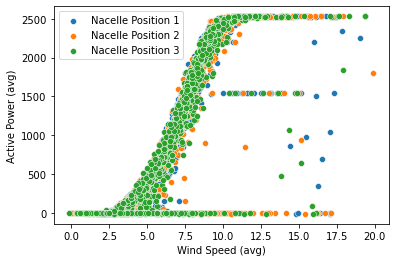

At a wind speed of 11.2 m/s and a nacelle position of 310.0, the predicted active power output is 2481.05 kW


In [10]:
# Filter the data based on different nacelle positions
nacelle_pos_1 = df[df['Nacelle Position (avg)'] == 1]
nacelle_pos_2 = df[df['Nacelle Position (avg)'] == 2]
nacelle_pos_3 = df[df['Nacelle Position (avg)'] == 3]

# Plot a scatter plot of wind speed (avg) against active power (avg) for each subset of the data
sns.scatterplot(x='Wind Speed (avg)', y='Active Power (avg)', data=nacelle_pos_1, label='Nacelle Position 1')
sns.scatterplot(x='Wind Speed (avg)', y='Active Power (avg)', data=nacelle_pos_2, label='Nacelle Position 2')
sns.scatterplot(x='Wind Speed (avg)', y='Active Power (avg)', data=nacelle_pos_3, label='Nacelle Position 3')
plt.legend()
plt.show()

# Fit a linear regression model to each subset of the data
reg_1 = LinearRegression().fit(nacelle_pos_1[['Wind Speed (avg)']], nacelle_pos_1['Active Power (avg)'])
reg_2 = LinearRegression().fit(nacelle_pos_2[['Wind Speed (avg)']], nacelle_pos_2['Active Power (avg)'])
reg_3 = LinearRegression().fit(nacelle_pos_3[['Wind Speed (avg)']], nacelle_pos_3['Active Power (avg)'])

# Use the regression models to predict the amount of power that will be generated at a specific wind speed and nacelle position
wind_speed = 11.2  # example wind speed
nacelle_pos = 310.0  # example nacelle position

if nacelle_pos == 1:
    predicted_power = reg_1.predict([[wind_speed]])
elif nacelle_pos == 2:
    predicted_power = reg_2.predict([[wind_speed]])
elif nacelle_pos == 3:
    predicted_power = reg_3.predict([[wind_speed]])
    
print(f'At a wind speed of {wind_speed} m/s and a nacelle position of {nacelle_pos}, the predicted active power output is {predicted_power[0]:.2f} kW')


In [8]:
#To find the correlation between two attributes: 

corr = np.corrcoef(df['Wind Speed (avg)'], df['Active Power (avg)'])[0, 1]
print('Correlation between wind speed and active power:', corr)

# Compute some statistics related to wind speed and active power
wind_speed_stats = df['Wind Speed (avg)'].describe()
power_stats = df['Active Power (avg)'].describe()

print('Wind Speed Statistics:')
print(wind_speed_stats)
print('\nActive Power Statistics:')
print(power_stats)

Correlation between wind speed and active power: 0.8193973376183697
Wind Speed Statistics:
count    365671.000000
mean          5.617686
std           2.644679
min          -1.380000
25%           3.730000
50%           5.370000
75%           7.200000
max          27.810000
Name: Wind Speed (avg), dtype: float64

Active Power Statistics:
count    365671.000000
mean        675.930678
std         784.143868
min         -28.000000
25%          -4.000000
50%         360.000000
75%        1129.000000
max        2535.000000
Name: Active Power (avg), dtype: float64


Correlation between reactive power and active power: -0.5060153797675679
Average Reactive Power: -155.9874090370899
Standard Deviation of Reactive Power: 264.9500602333024
Minimum Reactive Power: -902.84
Maximum Reactive Power: 1228.35
Average Active Power: 675.930678123231
Standard Deviation of Active Power: 784.1438679258723
Minimum Active Power: -28.0
Maximum Active Power: 2535.0


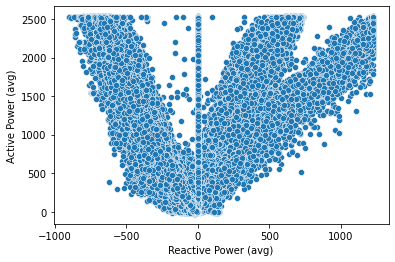

At a reactive power of 120.5, the predicted active power output is 261.86 kW


/Applications/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [23]:
# Compute the correlation between reactive power and active power
correlation = df['Reactive Power (avg)'].corr(df['Active Power (avg)'])
print("Correlation between reactive power and active power:", correlation)

# Compute the average, standard deviation, minimum, and maximum of the active power and reactive power
avg_reactive_power = df['Reactive Power (avg)'].mean()
std_reactive_power = df['Reactive Power (avg)'].std()
min_reactive_power = df['Reactive Power (avg)'].min()
max_reactive_power = df['Reactive Power (avg)'].max()

avg_active_power = df['Active Power (avg)'].mean()
std_active_power = df['Active Power (avg)'].std()
min_active_power = df['Active Power (avg)'].min()
max_active_power = df['Active Power (avg)'].max()

print("Average Reactive Power:", avg_reactive_power)
print("Standard Deviation of Reactive Power:", std_reactive_power)
print("Minimum Reactive Power:", min_reactive_power)
print("Maximum Reactive Power:", max_reactive_power)

print("Average Active Power:", avg_active_power)
print("Standard Deviation of Active Power:", std_active_power)
print("Minimum Active Power:", min_active_power)
print("Maximum Active Power:", max_active_power)

# Plot a scatter plot of reactive power (avg) against active power (avg)
sns.scatterplot(x='Reactive Power (avg)', y='Active Power (avg)', data=df)
plt.show()

# Fit a linear regression model to the data
reg = LinearRegression().fit(df[['Reactive Power (avg)']], df['Active Power (avg)'])

# Use the regression model to predict the amount of active power that will be generated at a specific reactive power
reactive_power = 120.5  # example reactive power

predicted_active_power = reg.predict([[reactive_power]])
    
print(f'At a reactive power of {reactive_power}, the predicted active power output is {predicted_active_power[0]:.2f} kW')